In [ ]:
# TODO: Read: chrome-extension://efaidnbmnnnibpcajpcglclefindmkaj/https://arxiv.org/pdf/2309.11798v4
# and https://www.nature.com/articles/s41598-024-58624-4 and https://www.nature.com/articles/s41598-024-58624-4

In [1]:
import config as cfg
from utils import *
import seaborn as sns

In [2]:
# Load data
all_viajes = pd.read_csv('/Users/caro/Desktop/thesis_project/mobility_data/VIAJES/all_viajes_month_0322.csv')
income = gpd.read_file('/Users/caro/Desktop/thesis_project/segregation_indices/data/processed/geometries_and_income.geojson')
gdf = gpd.read_file(cfg.ZONIFICACION_DATA / 'distritos/madrid_gdf.geojson')  # Load your GeoJSON file into a GeoDataFrame
gdf = gdf.to_crs(epsg=4326)

# Filter data
filtered_df = all_viajes.loc[(all_viajes['actividad_origen'] == 'casa')]

In [3]:
work = filtered_df.loc[(filtered_df['actividad_destino'] == 'trabajo_estudio')] # only trips from home to work
short_trips = all_viajes.loc[(all_viajes['distancia']=='0.5-2')]
long_trips = all_viajes.loc[(all_viajes['distancia']=='10-50')]

In [4]:
var_of_interest = 'Renta neta media por hogar'

In [5]:
G, trip_counts = define_graph(filtered_df)
G = update_node_sizes(G, income, var_of_interest)
positions = get_positions(gdf)
edge_colors, edge_widths = set_art(G, 0.6)
plotly_graph(G, positions, edge_colors, edge_widths, var_of_interest)

In [6]:
G2, trip_counts2 = define_graph(work)
G2 = update_node_sizes(G2, income, var_of_interest)
positions = get_positions(gdf)
edge_colors2, edge_widths2 = set_art(G2, 0.6)
plotly_graph(G2, positions, edge_colors2, edge_widths2, var_of_interest)

In [7]:
G3, trip_counts3 = define_graph(short_trips)
G3 = update_node_sizes(G3, income, var_of_interest)
positions = get_positions(gdf)
edge_colors3, edge_widths3 = set_art(G3, 0.6)
plotly_graph(G3, positions, edge_colors3, edge_widths3, var_of_interest)

In [8]:
G4, trip_counts4 = define_graph(long_trips)
G4 = update_node_sizes(G4, income, var_of_interest)
positions = get_positions(gdf)
edge_colors4, edge_widths4 = set_art(G4, 0.6)
plotly_graph(G4, positions, edge_colors4, edge_widths4, var_of_interest)

In [19]:
G5, trip_counts5 = define_graph(all_viajes)
G5 = update_node_sizes(G5, income, var_of_interest)
positions = get_positions(gdf)
edge_colors5, edge_widths5 = set_art(G5, 0.6)
plotly_graph(G5, positions, edge_colors5, edge_widths5, var_of_interest)

In [24]:
trip_counts5.sexo.value_counts()

sexo
hombre    101
mujer      97
Name: count, dtype: int64

In [26]:
trip_counts5

,origen,destino,sexo,trip_count,normalized_trip_count
0,2807901,2807901,hombre,96648,0.934876
1,2807901,2807901,mujer,89819,0.866244
2,2807901,2807902,hombre,56004,0.526401
3,2807901,2807902,mujer,51602,0.482161
4,2807901,2807903,hombre,47607,0.442011
...,...,...,...,...,...
871,2807921,2807916,mujer,38258,0.348053
878,2807921,2807920,hombre,45887,0.424725
879,2807921,2807920,mujer,39088,0.356395
880,2807921,2807921,hombre,81238,0.780004


In [11]:
len(G.edges)

149

In [12]:
nx.degree(G, weight='weight')

DiDegreeView({2807901: 10.725220535861048, 2807902: 7.647745329023067, 2807903: 6.513396526217742, 2807904: 8.455317516848393, 2807907: 7.667305901046517, 2807909: 8.445838584187168, 2807910: 7.310448742534655, 2807911: 8.38797874089091, 2807912: 6.34814530710646, 2807913: 10.255821598816503, 2807914: 6.736836337734919, 2807905: 8.541121034463865, 2807915: 9.280422990521068, 2807906: 6.027012218508575, 2807908: 8.641225138348585, 2807916: 7.204810695304365, 2807917: 5.458002301243768, 2807918: 5.717604514821106, 2807919: 5.742972987781492, 2807920: 8.103391594981096, 2807921: 3.568516793600351})

In [13]:
nx.betweenness_centrality(G, weight='weight')

{2807901: 0.19999999999999998,
 2807902: 0.02368421052631579,
 2807903: 0.010526315789473684,
 2807904: 0.07894736842105263,
 2807907: 0.013157894736842105,
 2807909: 0.02368421052631579,
 2807910: 0.02631578947368421,
 2807911: 0.07631578947368421,
 2807912: 0.0,
 2807913: 0.12894736842105262,
 2807914: 0.10263157894736842,
 2807905: 0.12368421052631579,
 2807915: 0.05789473684210526,
 2807906: 0.0,
 2807908: 0.049999999999999996,
 2807916: 0.04736842105263158,
 2807917: 0.010526315789473684,
 2807918: 0.002631578947368421,
 2807919: 0.034210526315789476,
 2807920: 0.09999999999999999,
 2807921: 0.0}

In [14]:
print_node_degrees(G)

Node Degrees (In-degree, Out-degree, Total degree):
Node 2807901: In-degree = 15, Out-degree = 8, Total degree = 23
Node 2807902: In-degree = 7, Out-degree = 8, Total degree = 15
Node 2807903: In-degree = 7, Out-degree = 6, Total degree = 13
Node 2807904: In-degree = 11, Out-degree = 7, Total degree = 18
Node 2807907: In-degree = 9, Out-degree = 6, Total degree = 15
Node 2807909: In-degree = 9, Out-degree = 6, Total degree = 15
Node 2807910: In-degree = 5, Out-degree = 8, Total degree = 13
Node 2807911: In-degree = 6, Out-degree = 10, Total degree = 16
Node 2807912: In-degree = 5, Out-degree = 6, Total degree = 11
Node 2807913: In-degree = 8, Out-degree = 12, Total degree = 20
Node 2807914: In-degree = 7, Out-degree = 8, Total degree = 15
Node 2807905: In-degree = 10, Out-degree = 7, Total degree = 17
Node 2807915: In-degree = 7, Out-degree = 10, Total degree = 17
Node 2807906: In-degree = 5, Out-degree = 5, Total degree = 10
Node 2807908: In-degree = 7, Out-degree = 8, Total degree = 

In [15]:
# Check total in-weights for each node
in_weights = check_in_weights(G)

Node 2807901 Total In-weight: 6.840556681825653
Node 2807902 Total In-weight: 3.791025149306887
Node 2807903 Total In-weight: 3.5282998191879895
Node 2807904 Total In-weight: 5.128869650978029
Node 2807907 Total In-weight: 4.472083721439921
Node 2807909 Total In-weight: 4.7420963234891245
Node 2807910 Total In-weight: 2.8253794312640403
Node 2807911 Total In-weight: 3.4402498493233247
Node 2807912 Total In-weight: 3.067612733548847
Node 2807913 Total In-weight: 4.144156484576188
Node 2807914 Total In-weight: 3.125691742918197
Node 2807905 Total In-weight: 4.886143225028765
Node 2807915 Total In-weight: 3.910799408251603
Node 2807906 Total In-weight: 2.864445783792669
Node 2807908 Total In-weight: 4.180428469672894
Node 2807916 Total In-weight: 3.5779409347433013
Node 2807917 Total In-weight: 2.650978028601173
Node 2807918 Total In-weight: 2.801161580187387
Node 2807919 Total In-weight: 3.1102953262834916
Node 2807920 Total In-weight: 3.4933976220481067
Node 2807921 Total In-weight: 1.8

In [16]:
# Check total out-weights for each node
out_weights = check_out_weights(G)

Node 2807901 Total Out-weight: 3.8846638540353955
Node 2807902 Total Out-weight: 3.85672017971618
Node 2807903 Total Out-weight: 2.985096707029752
Node 2807904 Total Out-weight: 3.3264478658703633
Node 2807907 Total Out-weight: 3.1952221796065965
Node 2807909 Total Out-weight: 3.703742260698044
Node 2807910 Total Out-weight: 4.485069311270615
Node 2807911 Total Out-weight: 4.947728891567586
Node 2807912 Total Out-weight: 3.280532573557613
Node 2807913 Total Out-weight: 6.111665114240315
Node 2807914 Total Out-weight: 3.6111445948167225
Node 2807905 Total Out-weight: 3.6549778094350995
Node 2807915 Total Out-weight: 5.369623582269465
Node 2807906 Total Out-weight: 3.162566434715906
Node 2807908 Total Out-weight: 4.460796668675689
Node 2807916 Total Out-weight: 3.6268697605610645
Node 2807917 Total Out-weight: 2.8070242726425954
Node 2807918 Total Out-weight: 2.916442934633719
Node 2807919 Total Out-weight: 2.6326776614980005
Node 2807920 Total Out-weight: 4.6099939729329895
Node 2807921

In [17]:
adj_matrix = get_adj_matrix(G)

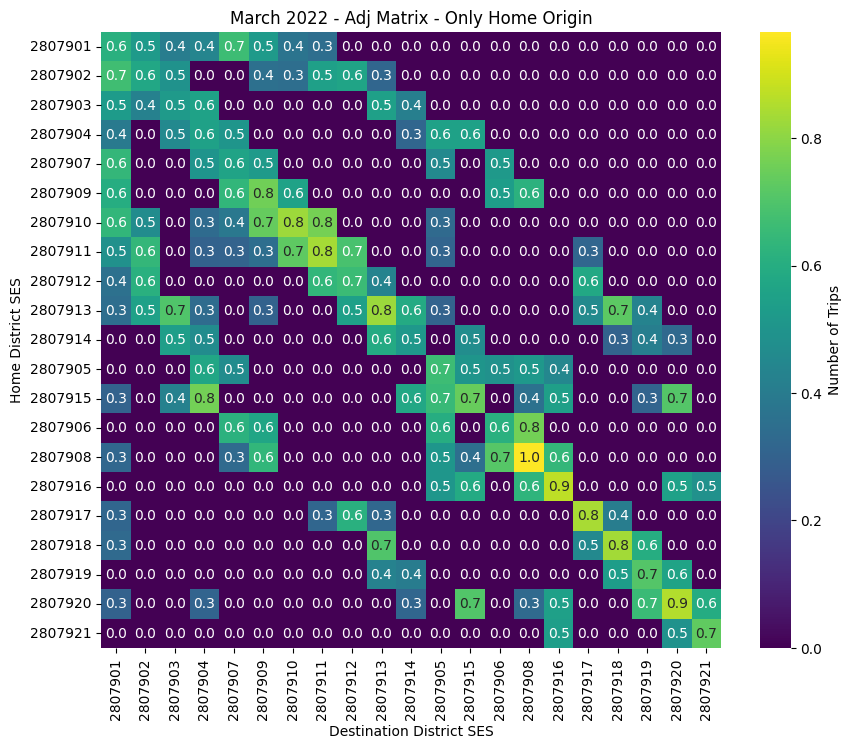

In [18]:
plt.figure(figsize=(10, 8))
sns.heatmap(
    adj_matrix, 
    annot=True, 
    cmap='viridis', 
    cbar_kws={'label': 'Number of Trips'}, 
    fmt=".1f"
)
plt.title('March 2022 - Adj Matrix - Only Home Origin')
plt.xlabel('Destination District SES')
plt.ylabel('Home District SES');

In [17]:
# nx.write_gml(G, "0322_home_origin_graph.gml")

## Trip count analysis

In [18]:
high_rent_df = trip_counts[trip_counts['renta'] == '>15'].sort_values(by='trip_count', ascending=False)
high_rent_top3 = high_rent_df.head(3)
high_rent_bottom3 = high_rent_df.tail(3)

# Filter medium rent (10-15)
medium_rent_df = trip_counts[trip_counts['renta'] == '10-15'].sort_values(by='trip_count', ascending=False)
medium_rent_top3 = medium_rent_df.head(3)
medium_rent_bottom3 = medium_rent_df.tail(3)

# Filter low rent (<10)
low_rent_df = trip_counts[trip_counts['renta'] == '<10'].sort_values(by='trip_count', ascending=False)
low_rent_top3 = low_rent_df.head(3)
low_rent_bottom3 = low_rent_df.tail(3)

# Combine the results into one DataFrame for easy viewing
top3_bottom3_combined = pd.concat([
    high_rent_top3, high_rent_bottom3,
    medium_rent_top3, medium_rent_bottom3,
    low_rent_top3, low_rent_bottom3
])

In [19]:
top3_bottom3_combined

,origen,destino,renta,trip_count,normalized_trip_count
154,2807908,2807908,>15,36658,1.000000
330,2807916,2807916,>15,32866,0.893749
176,2807909,2807909,>15,28981,0.784892
312,2807915,2807919,>15,12507,0.323293
33,2807902,2807913,>15,12496,0.322985
76,2807904,2807914,>15,11910,0.306565
418,2807920,2807920,10-15,32256,0.876657
352,2807917,2807917,10-15,31835,0.864860
374,2807918,2807918,10-15,31698,0.861022
346,2807917,2807911,10-15,11947,0.307602


In [20]:
plot_communities(G, positions, nx.community.louvain_communities(G, weight='weight', resolution=1.2, seed=1234), edge_colors, edge_widths, var_of_interest)

In [30]:
plot_communities(G2, positions, nx.community.louvain_communities(G2), edge_colors, edge_widths, var_of_interest)

In [28]:
plot_communities(G3, positions, nx.community.louvain_communities(G3), edge_colors, edge_widths, var_of_interest)

In [29]:
plot_communities(G4, positions, nx.community.louvain_communities(G4), edge_colors, edge_widths, var_of_interest)

In [24]:
plot_communities(G, nx.circular_layout(G), nx.community.louvain_communities(G, weight='weight', resolution=1.2, seed=1234), edge_colors, edge_widths, var_of_interest)

In [25]:
nx.community.modularity(G, nx.community.louvain_communities(G, weight='weight', seed=1234), weight='weight')

0.4167989713121699

## Testing Infomap

In [26]:
edges_with_weights = [(u, v, data['weight']) for u, v, data in G.edges(data=True)]

df_edges = pd.DataFrame(edges_with_weights, columns=['source', 'target', 'weight'])
df_edges = df_edges[df_edges['weight'] >= 0.3] # NOTE: Infomap only finds 1 community if I leave edges as they are. Hence, I had to cut edges 

df_edges.to_csv('infomap_input.txt', sep=' ', header=False, index=False)

In [27]:
df_edges

,source,target,weight
0,2807901,2807901,0.629914
1,2807901,2807902,0.548320
2,2807901,2807903,0.424445
3,2807901,2807904,0.448233
4,2807901,2807907,0.680910
...,...,...,...
138,2807920,2807920,0.876657
139,2807920,2807921,0.633192
140,2807921,2807916,0.566085
141,2807921,2807920,0.526633
